In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")



In [32]:
# reflect an existing database into a new model
base = automap_base()


# reflect the tables
base.prepare(engine, reflect=True)

In [34]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [40]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [50]:
# Find the most recent date in the data set.
max_date = session.query(func.max(measurement.date)).first()

max_date

('2017-08-23')

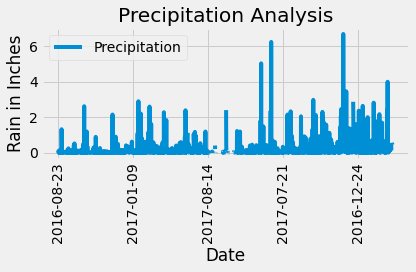

<Figure size 1080x2160 with 0 Axes>

In [104]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
one_year_data = dt.date(2017,8,23)- dt.timedelta(days = 365)

one_year_data

# Perform a query to retrieve the data and precipitation scores
twl_month_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_data).all()

twl_month_data

# Save the query results as a Pandas DataFrame and set the index to the date column

table = pd.DataFrame(twl_month_data, columns = ['Date', 'Precipitation'] )

table

# Sort the dataframe by date
table.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
table.plot('Date', 'Precipitation')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.figure(figsize = (15,30))
plt.show()



In [105]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#use describe 

table.descirbe()


AttributeError: 'DataFrame' object has no attribute 'descirbe'

# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.max(station.id)).all()

total_stations

[(9)]

In [81]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station).count()

active_stations

19550

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()